# Programming for Artificial Intelligence（Python）- Homework 8

**Student:** 林澈 

**Student ID:** 15220202205098

<span style="color: steelblue;">* Disclaimer: I have neither given nor received unauthorized assistance on this assignment.</span>


## 0. Import

In [364]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm

## 1. China’s GDP by province

In [365]:
# Read data
gdp = pd.read_csv('GDP_by_province.csv')

### 1.1 The GDP data

It is panel data since there are values taken from multiple time points (from 2014 to 2022) with each contains several observations (Beijing, Tianjin, ..., Xinjiang).

In [366]:
# Drop rows with missing values
gdp.dropna(inplace=True)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Province  31 non-null     object 
 1   2022      31 non-null     float64
 2   2021      31 non-null     float64
 3   2020      31 non-null     float64
 4   2019      31 non-null     float64
 5   2018      31 non-null     float64
 6   2017      31 non-null     float64
 7   2016      31 non-null     float64
 8   2015      31 non-null     float64
 9   2014      31 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.7+ KB


### 1.2 Wide to long

In [367]:
# Transform the wide table to a long one
gdp_long = gdp.melt(id_vars=['Province'], 
                var_name='Year',
                value_name='GDP')
gdp_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Province  279 non-null    object 
 1   Year      279 non-null    object 
 2   GDP       279 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


In [368]:
# Correct the data types
gdp_long.dropna(subset=['GDP'], inplace=True)  # 仅删除 GDP 列中的缺失值

gdp_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Province  279 non-null    object 
 1   Year      279 non-null    object 
 2   GDP       279 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


### 1.3 The shift method of pandas

In [369]:
# Sample DataFrame
age_data1 = pd.DataFrame({
    "id": [1, 1, 1, 1, 1],
    "year": [2002, 2004, 2003, 2005, 2006],
    "age": [23, 25, 24, 26, 27, ],
})

# Shift age by one year
age_data1['last_age'] = (
    age_data1
    # ensure
    .sort_values(by="year", ascending=True)
    .age
    .shift(periods=1)
    .fillna(min(age_data1['age']-1))
    .astype(int)
)

age_data1

,id,year,age,last_age
0,1,2002,23,22
1,1,2004,25,24
2,1,2003,24,23
3,1,2005,26,25
4,1,2006,27,26


In [370]:
# Sample DataFrame
age_data2 = pd.DataFrame({
    "id": [1, 1, 1, 1, 1, 2, 2, 2, 2, 2,],
    "year": [2002, 2004, 2003, 2005, 2006, 2002, 2004, 2003, 2005, 2006],
    "age": [23, 25, 24, 26, 27, 17, 19, 18, 20, 21],
})

# Shift age by one year
age_data2['last_age'] = (
    age_data2
    .sort_values(by="year", ascending=True)
    .groupby("id")
    .age
    .shift(periods=1)
    .fillna(min(age_data2['age']-1))
    .astype(int)
)
age_data2

,id,year,age,last_age
0,1,2002,23,16
1,1,2004,25,24
2,1,2003,24,23
3,1,2005,26,25
4,1,2006,27,26
5,2,2002,17,16
6,2,2004,19,18
7,2,2003,18,17
8,2,2005,20,19
9,2,2006,21,20


### 1.4 The average increments in GDP

In [371]:
gdp_long

,Province,Year,GDP
0,Beijing,2022,41540.9
1,Tianjin,2022,16132.2
2,Hebei,2022,41988.0
3,Shanxi,2022,25583.9
4,Neimenggu,2022,23388.9
...,...,...,...
274,Shaanxi,2014,17402.5
275,Gansu,2014,6518.4
276,Qinghai,2014,1847.7
277,Ningxia,2014,2473.9


In [372]:
# GDP in last year
gdp_long['last_GDP'] = (
    gdp_long
    .sort_values(by="Year", ascending=True)
    .groupby("Province")
    .GDP
    .shift(periods=1)
)

# Increment of GDP
gdp_long['increment'] = gdp_long['GDP'] - gdp_long['last_GDP']

# Compute the average increments of GDP
gdp_long['average_increment'] = (
    gdp_long
    .groupby("Province")
    .increment
    .transform('mean')
)

gdp_long

,Province,Year,GDP,last_GDP,increment,average_increment
0,Beijing,2022,41540.9,41045.6,495.3,2326.8625
1,Tianjin,2022,16132.2,15685.1,447.1,686.4500
2,Hebei,2022,41988.0,40397.1,1590.9,2097.3875
3,Shanxi,2022,25583.9,22870.4,2713.5,1686.1500
4,Neimenggu,2022,23388.9,21166.0,2222.9,1403.8375
...,...,...,...,...,...,...
274,Shaanxi,2014,17402.5,NaN,NaN,1929.4625
275,Gansu,2014,6518.4,NaN,NaN,575.3750
276,Qinghai,2014,1847.7,NaN,NaN,221.9500
277,Ningxia,2014,2473.9,NaN,NaN,328.8375


### 1.5 Plotting the GDP of four cities

/var/folders/9j/lqzc1l016p59ks_k2hm2s9cr0000gn/T/ipykernel_17302/707826753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipal_data.sort_values(by=['Year'], inplace=True)


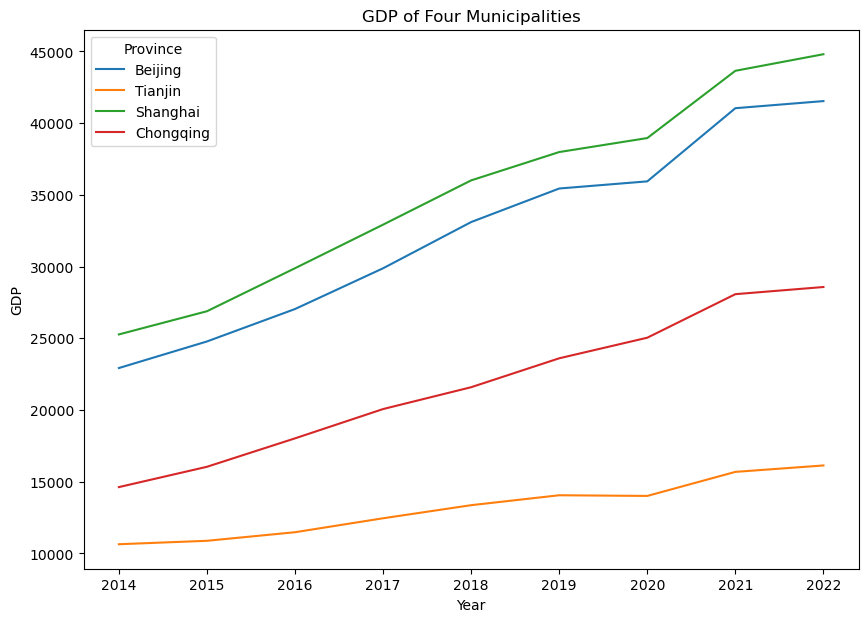

In [373]:
municipalities = ['Beijing', 'Tianjin', 'Shanghai', 'Chongqing',]
municipal_data = gdp_long[gdp_long['Province'].isin(municipalities)]
municipal_data.sort_values(by=['Year'], inplace=True)

plt.figure(figsize=(10, 7))
for city in municipalities:
    city_data = municipal_data[municipal_data['Province'] == city]
    plt.plot(city_data['Year'], city_data['GDP'], label=city)

plt.legend(title='Province', loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Four Municipalities')
plt.show()


### 1.6 GDP and consumption

conclusion: Last year’s GDP will significantly influence the consumption of this year since its p-value in OLS is less than 0.05.

In [374]:
# Read and preprocess consumption data
consumption = pd.read_csv('consumption_by_province.csv')
consumption = (
    consumption
    .melt(id_vars='Province', 
          var_name='Year',
          value_name='Consumption')
    .dropna(subset=['Consumption'])
)

# merge gdp and consumption 
gdp_consumption = pd.merge(gdp_long, consumption, on=['Province', 'Year'])
gdp_consumption.dropna(inplace=True)

In [375]:
# Fit a linear regression model
X = sm.add_constant(gdp_consumption['last_GDP'])
y = gdp_consumption['Consumption']
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     28.73
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           6.60e-07
Time:                        11:17:30   Log-Likelihood:                -938.26
No. Observations:                  90   AIC:                             1881.
Df Residuals:                      88   BIC:                             1886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.5e+04   1391.125     10.782      0.000    1.22e+04    1.78e+04
last_GDP       0.2544      0.047      5.360      0.000       0.160       0.349
==============================================================================
Omnibus:                       61.204   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.747
Skew:                           2.391   Prob(JB):                     5.21e-48
Kurtosis:                       8.932   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

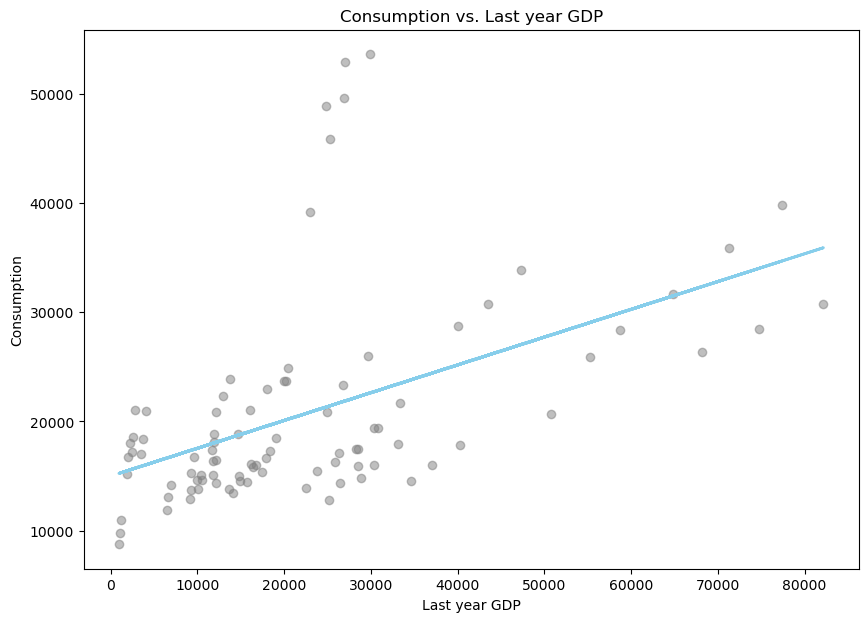

In [376]:
# plot the data and regression line and draw conclusion
plt.figure(figsize=(10, 7))
plt.scatter(gdp_consumption['last_GDP'], gdp_consumption['Consumption'], color='grey', alpha=0.5)
plt.plot(gdp_consumption['last_GDP'], results.predict(), color='skyblue', linewidth=2)
plt.xlabel('Last year GDP')
plt.ylabel('Consumption')
plt.title('Consumption vs. Last year GDP')
plt.show()

### 1.7 GDP by region

In [377]:
# read region data
region = pd.read_csv('region.csv')
melted_region = region.melt(id_vars=["Region"], 
                        value_name="Province").drop(columns=["variable"])
melted_region.dropna(subset='Province', inplace=True)


all_data = pd.merge(gdp_long, melted_region, on='Province')
regional_gdp_year = all_data.groupby(['Year','Region'])['GDP'].sum()

regional_gdp_year = pd.DataFrame(regional_gdp_year)


### 1.8 Provinces’ contributions

In [378]:
y = '2022'

regional_gdp_year.loc[y, r]

GDP    148633.9
Name: (2022, North), dtype: float64

In [379]:
def gdp_by_year_and_region(y, r):
    return regional_gdp_year.loc[y, r]

In [380]:

all_data['region_year_GDP'] = all_data.apply(lambda row: gdp_by_year_and_region(row['Year'], row['Region']) if row['Year'] in ["2020", "2021", "2022"] else None, axis=1)
all_data

,Province,Year,GDP,last_GDP,increment,average_increment,Region,region_year_GDP
0,Beijing,2022,41540.9,41045.6,495.3,2326.8625,North,148633.9
1,Beijing,2021,41045.6,35943.3,5102.3,2326.8625,North,141164.2
2,Beijing,2020,35943.3,35445.1,498.2,2326.8625,North,121058.7
3,Beijing,2019,35445.1,33106.0,2339.1,2326.8625,North,NaN
4,Beijing,2018,33106.0,29883.0,3223.0,2326.8625,North,NaN
...,...,...,...,...,...,...,...,...
274,Xinjiang,2018,12809.4,11159.9,1649.5,1097.2750,Northwest,NaN
275,Xinjiang,2017,11159.9,9630.8,1529.1,1097.2750,Northwest,NaN
276,Xinjiang,2016,9630.8,9306.9,323.9,1097.2750,Northwest,NaN
277,Xinjiang,2015,9306.9,9264.5,42.4,1097.2750,Northwest,NaN


/var/folders/9j/lqzc1l016p59ks_k2hm2s9cr0000gn/T/ipykernel_17302/2295850746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_data['contribution'] = east_data['GDP']/east_data['region_year_GDP']


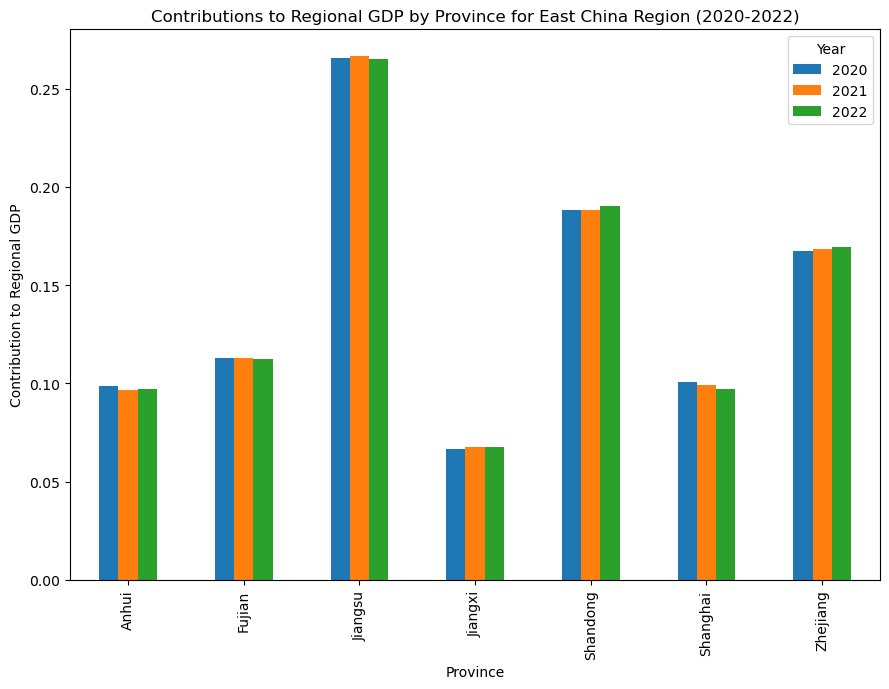

In [381]:

east_data = all_data[(all_data['Region'] == 'East') & (all_data['Year'].isin(['2020', '2021', '2022']))]
east_data['contribution'] = east_data['GDP']/east_data['region_year_GDP']
df_east_pivot = east_data.pivot(index='Province', columns='Year', values='contribution')

df_east_pivot.plot(kind='bar', figsize=(9, 7))

# Adding title and labels
plt.title('Contributions to Regional GDP by Province for East China Region (2020-2022)')
plt.xlabel('Province')
plt.ylabel('Contribution to Regional GDP')

# Showing the legend
plt.legend(title='Year')

# Display the plot
plt.tight_layout()
plt.show()